In [1]:
#import libraries
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score 


In [3]:
#Import data
df_train_master = pd.read_csv('Train.csv')
df_test_master = pd.read_csv('Test.csv')

#create working copies of the dataset
df_train = df_train_master.copy()
df_test = df_test_master.copy()



In [4]:

df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
#Key metrics derived from the data set
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [6]:
#Chekcing for null values
df_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64


### Observations:
###     1) There are 2 columnms - v1, v2 with 18 null values, these can be removed from the training data as this is a small number in a 20000 dataset and wont impact the model. Alternatively, we can impute the values and replace the null value with the median
###     2) Duplicate values check is not required since the features are obsured and duplicate values may be valid


In [9]:
#Removing diplicates from Column V1
df_train = df_train[df_train['V1'].notna()]

In [10]:
#Removing Duplicates from column V2
df_train = df_train[df_train['V2'].notna()]

In [11]:
#missing row check to confirm there are no more missing rows
df_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [16]:
#Checking Data Types
df_train.dtypes


V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
V32       float64
V33       float64
V34       float64
V35       float64
V36       float64
V37       float64
V38       float64
V39       float64
V40       float64
Target      int64
dtype: object

## Observations:
###     1) All variables are numerical, and ONE HOT ENCODING is not required


In [17]:

#Check Class Distribution for the target varaiable
df_train["Target"].value_counts(normalize=True)*100




Target
0    94.439992
1     5.560008
Name: proportion, dtype: float64

## Observations:
###     1) The faliure rate is low at 5.6%, this can cause class imbalance in the model's prediction. 
###     2) We need to use the compute class weight function from the keras lib to the assign more weightage to class: 1

In [ ]:

#EDA Analysis, generating a corelation matrix for the top 10 most co related features
corr_target = df_train.corr()['Target'].sort_values(ascending=False)
corr_target

top_features = corr_target.iloc[1:11].index
top_features


Index(['V21', 'V15', 'V7', 'V16', 'V28', 'V11', 'V34', 'V8', 'V14', 'V4'], dtype='object')

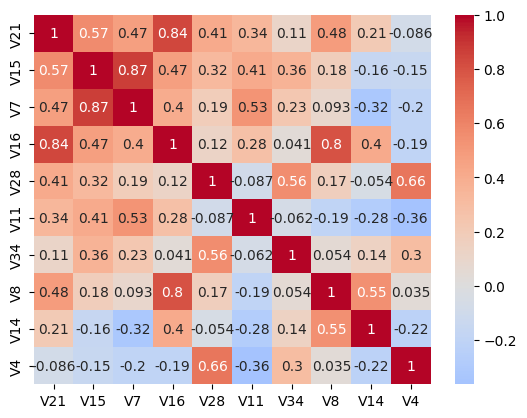

In [19]:
#corealation matrix 
plt.Figure(figsize=(40, 30))
sns.heatmap(df_train[top_features].corr(), annot=True,cmap='coolwarm', center=0)
plt.show()

## Observations:
###     1) There are too many features to generate a redable heatmap. Therefore, top 10 most corelated features are chosen for corelation matrix.
###     2) V7 & V15 are higly corealted,
###     3) V16 and V21 are highly corealted
###     4) V16 and V8 are highly corealted

In [21]:
#split the dataset into prdictors and target variuable
x = df_train.drop(columns="Target", axis=1)
y = df_train["Target"]
#split training data into training and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

#import test data
x_test = df_test.drop('Target', axis=1)
y_test = df_test['Target']

In [22]:
#scale training,validation, test dataset - even though the dataset already seems to be scaled, it is not hurt to scale again and is a safe practice for neural networks
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_val = scalar.fit_transform(x_val)
x_test = scalar.fit_transform(x_test)

## Observations:
###     1) Even though the features are obsucured and scaled, it would still beneficial to scale them again to have a normal distribution for all features.
###     2) Both train/val and test dataset are scaled

In [23]:
#Handling class weight imbalance
weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0:weights[0], 1:weights[1]}
class_weights
#m

{0: np.float64(0.5294385087519891), 1: np.float64(8.992277992277993)}

 ## Observations:
 ###    1) Class Imbalance in the target variable is used the compute_class_weight function from the keras lib.
 ###    2) More weigtage will be given to the class 1, failures will carry more weight and Model will try to predict them harder. These will be passed when fitting the model

In [24]:
#helper functions
#1) plot loss on train and validation set
def plot(history, name):

    fig, ax = plt.subplots()
    plt.plot(history.history[name])
    plt.plot(history.history['val_'+name])

    plt.title('Model ' + name.capitalize())
    plt.ylabel(name.capitalize())
    plt.xlabel('Epoch')
    fig.legend(['Train', 'Validation'], loc="outside right upper")

In [25]:
#2) plot confusion matrix
def create_confusion_matrix(model, predictors, target, threshold=0.5):

    y_prob = model.predict(predictors)
    y_pred = (y_prob >= threshold).astype(int)

    cm = confusion_matrix(target, y_pred)

    total = cm.sum()
    labels = np.array([
        [
            f"{cm[i,j]}\n{cm[i,j]/total:.2%}"
            for j in range(2)
        ]
        for i in range(2)
    ])
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    
    

In [26]:
#3) calculate performance metrics
def model_performance_metrics(model, predictors, target, threshold =0.5):

    y_pred = model.predict(predictors) > threshold

    recall = recall_score(target, y_pred)
    accuracy = accuracy_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    precision = precision_score(target, y_pred)

    df_perf = pd.DataFrame({"Accuracy": accuracy, "Recall": recall, "f1": f1, "Precision": precision}, index=[0])
    return df_perf

# Model 0 - Base Model

In [27]:
#Build model 0 
tf.keras.backend.clear_session()

In [28]:
model = Sequential()
optimizer = tf.keras.optimizers.SGD()
metrics = [tf.keras.metrics.Recall(name='recall')]
input_dim = x_train.shape[1]
model.add(Dense(32, activation="relu", input_dim=input_dim))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)

In [30]:
start = time()
history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=25, batch_size=64, class_weight=class_weights)
end = time()

Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5504 - recall: 0.7658 - val_loss: 0.4551 - val_recall: 0.8529
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.3867 - recall: 0.8584 - val_loss: 0.3879 - val_recall: 0.9039
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3454 - recall: 0.8829 - val_loss: 0.3476 - val_recall: 0.9219
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.3238 - recall: 0.8855 - val_loss: 0.3140 - val_recall: 0.9219
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.3084 - recall: 0.8880 - val_loss: 0.2914 - val_recall: 0.9309
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.2970 - recall: 0.8945 - val_loss: 0.2603 - val_recall: 0.9279
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.2877 - recall: 0.8880 - val_loss: 0.2517 - val_recall: 0.9249
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.2803 - recall: 0.8893 - val_loss: 0.2509 - val_recall: 0

In [32]:
print("Total time taken: ", end-start)

Total time taken:  3.7007806301116943


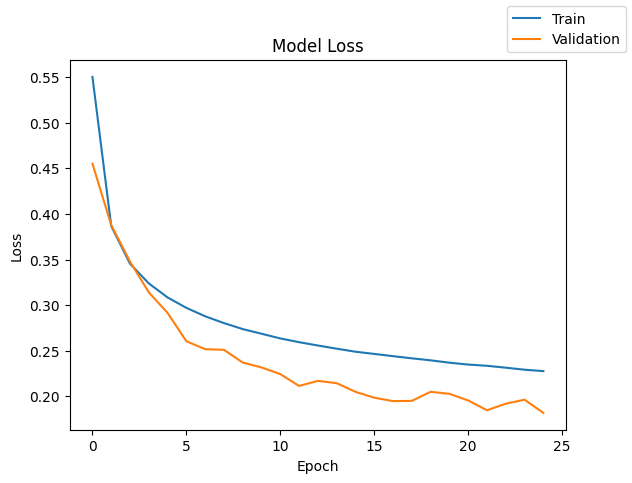

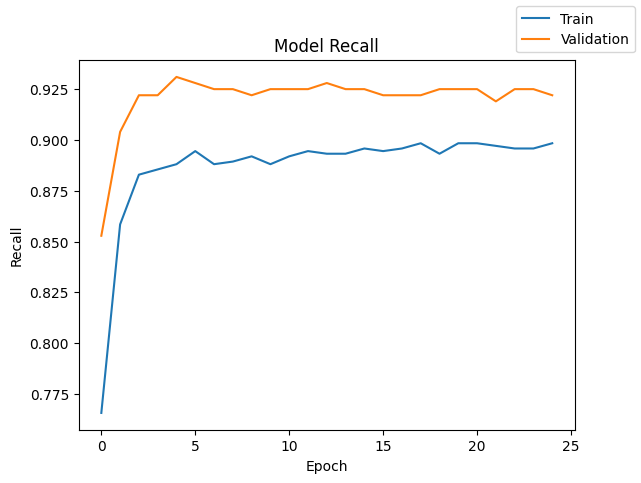

In [33]:
plot(history, 'loss')
plot(history, 'recall')


In [34]:
metrics_train= model_performance_metrics(model=model, target=y_train, predictors=x_train)
metrics_train



437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


,Accuracy,Recall,f1,Precision
0,0.957349,0.899614,0.701103,0.574363


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


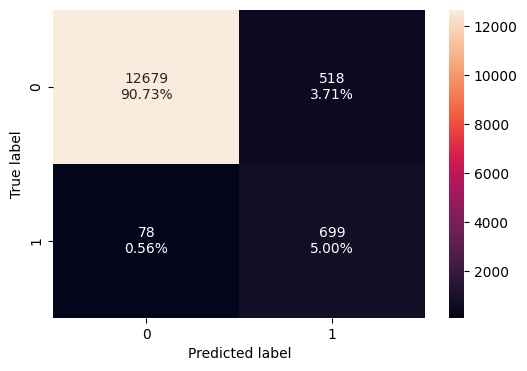

In [35]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [36]:
metrics_val = model_performance_metrics(model=model, target=y_val, predictors=x_val)
metrics_val


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step


,Accuracy,Recall,f1,Precision
0,0.960601,0.921922,0.722353,0.59381


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step


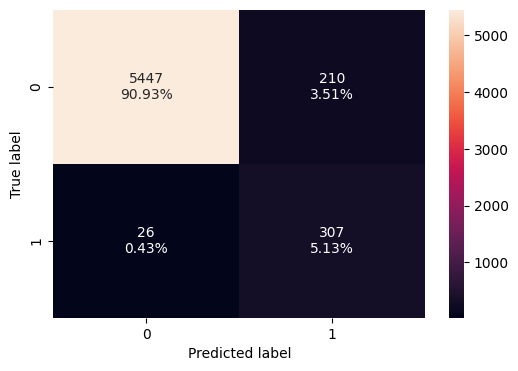

In [37]:
create_confusion_matrix(model=model, target=y_val, predictors=x_val)

In [38]:
metrics_test = model_performance_metrics(model=model, target=y_test, predictors=x_test)
metrics_test


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


,Accuracy,Recall,f1,Precision
0,0.9545,0.858156,0.680731,0.564103


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


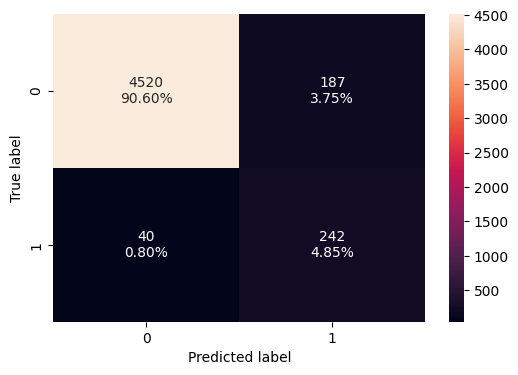

In [39]:
create_confusion_matrix(model=model, target=y_test, predictors=x_test)

In [40]:
results = pd.DataFrame(columns=["model", "HiddenLayers", "Neurons", "Activation", "Optimizer", "DropOuts", "BatchNorm", "L2", "epochs",  "batch size", "time taken", "trian_loss","val_loss", "train_recall", "val_recall", "test_recall"])

In [41]:
results.loc[0] = ["Model - SGD, No Normalization", 1, [32], ["relu"], "SGD", [0], "No", 0, 25, 64,  round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.7,0.227557,0.181685,0.899614,0.921922,0.858156


## Observations:
###     1) Base model is using SGD for optimization, it contains 32 Neurons, no hidden layers and it does not uses any optimnization technique.
###     2) With a recall of of 0.89, and test recall of 0.85, its not a bad start but the model is overfitting

## Next Experiment: Try SGD with optimization as the optimizer

In [42]:
#model 1 SGD with Momentum, NO Regulization
tf.keras.backend.clear_session()
model = Sequential()


In [43]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
metrics = [tf.keras.metrics.Recall(name='recall')]
model.add(Dense(32, activation="relu", input_dim=input_dim))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
epochs=25
batch_size = 64
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [45]:
start=time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3447 - recall: 0.8636 - val_loss: 0.3132 - val_recall: 0.9219
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.2734 - recall: 0.8829 - val_loss: 0.2198 - val_recall: 0.9129
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.2537 - recall: 0.8867 - val_loss: 0.1934 - val_recall: 0.9189
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.2417 - recall: 0.8906 - val_loss: 0.1773 - val_recall: 0.9189
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.2349 - recall: 0.8932 - val_loss: 0.1428 - val_recall: 0.9159
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.2339 - recall: 0.8842 - val_loss: 0.1350 - val_recall: 0.9069
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.2256 - recall: 0.8880 - val_loss: 0.1779 - val_recall: 0.9159
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.2248 - recall: 0.8996 - val_loss: 0.1368 - val_recall: 0

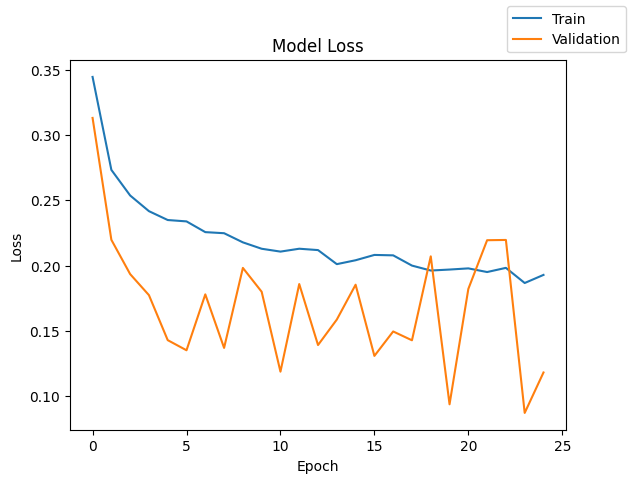

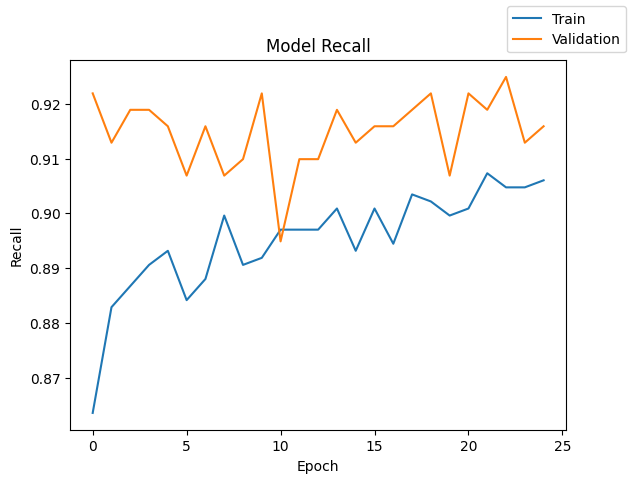

In [46]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [47]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


,Accuracy,Recall,f1,Precision
0,0.976098,0.907336,0.808486,0.729059


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step


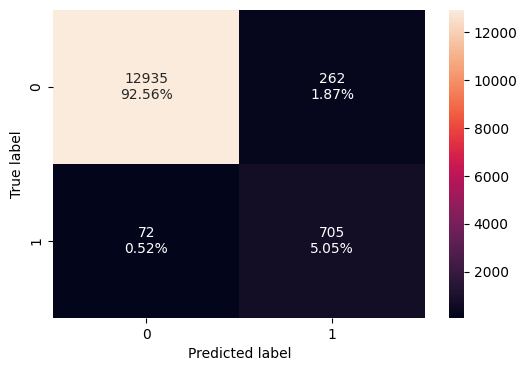

In [48]:
create_confusion_matrix(model=model, target=y_train, predictors=x_train)

In [49]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


,Accuracy,Recall,f1,Precision
0,0.975292,0.915916,0.804749,0.717647


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


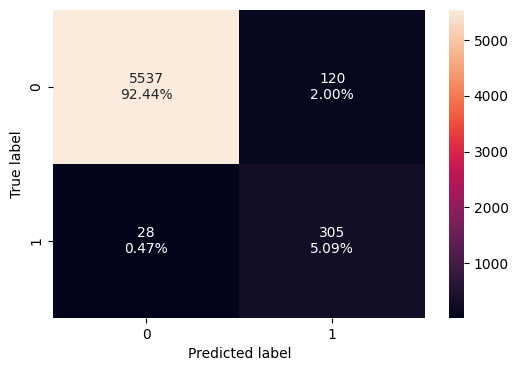

In [50]:
create_confusion_matrix(model=model, target=y_val, predictors=x_val)

In [51]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


,Accuracy,Recall,f1,Precision
0,0.970535,0.861702,0.767773,0.692308


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step


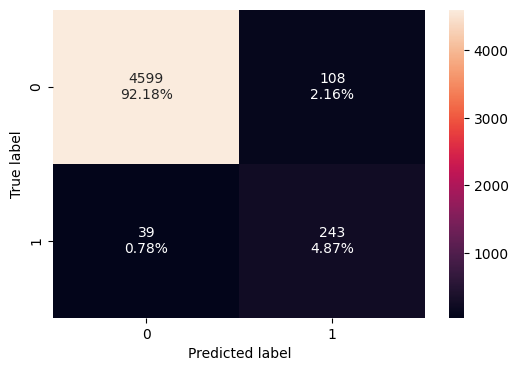

In [52]:
create_confusion_matrix(model=model, target=y_test, predictors=x_test)

In [53]:
results.loc[1] = ["Model - SGD with Momentum, No Normalization", 1, [32], ["relu"], "SGD with momentum", [0], "No", 0, 25, 64,  round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702


## Observations:
###     1) This model has SGD with momentum as the optimizing technique.
###     2) Compared to the base model it has a higher recall - which is the key metric - on the training and val/test datasets. This means adding momoentum imrove model perfomace.
###     3) Model is still overfitting slightly.

## Next Experiment: Run the next iteration with ADAM as the optimizer.

In [54]:
#Model 2 - Adam, NoRegularization
tf.keras.backend.clear_session()
model = Sequential()

In [55]:

model.add(Dense(32, activation="relu", input_dim=input_dim))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [57]:
start=time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4504 - recall: 0.8676 - val_loss: 0.3489 - val_recall: 0.9009
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.3260 - recall: 0.9060 - val_loss: 0.2678 - val_recall: 0.9249
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.2901 - recall: 0.8945 - val_loss: 0.2646 - val_recall: 0.9279
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.2691 - recall: 0.8970 - val_loss: 0.2426 - val_recall: 0.9219
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.2535 - recall: 0.8932 - val_loss: 0.1992 - val_recall: 0.9219
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.2421 - recall: 0.8919 - val_loss: 0.1813 - val_recall: 0.9159
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.2365 - recall: 0.8932 - val_loss: 0.2079 - val_recall: 0.9219
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.2304 - recall: 0.8932 - val_loss: 0.2034 - val_recall: 0

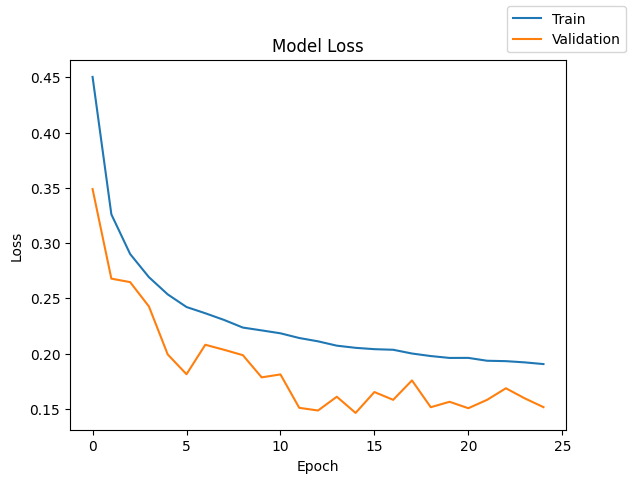

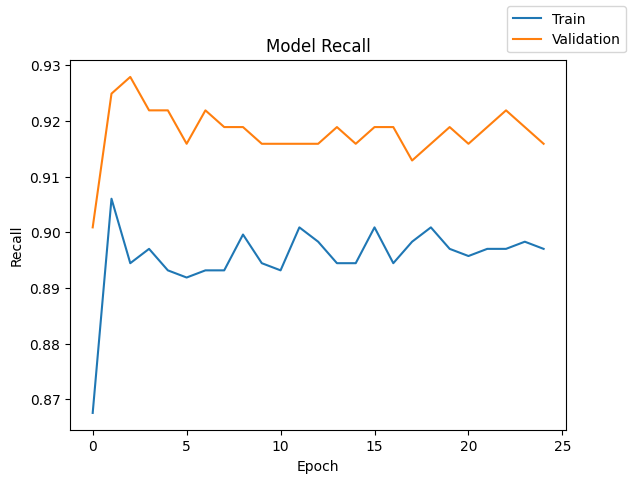

In [58]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [59]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


,Accuracy,Recall,f1,Precision
0,0.972163,0.899614,0.782317,0.692079


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


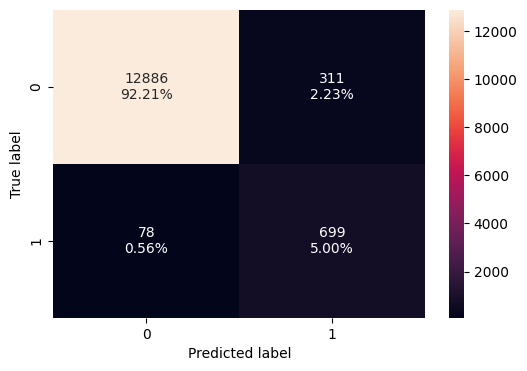

In [60]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [61]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


,Accuracy,Recall,f1,Precision
0,0.974624,0.915916,0.800525,0.710956


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


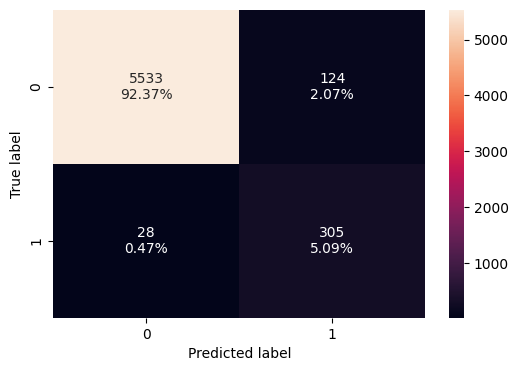

In [62]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [63]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


,Accuracy,Recall,f1,Precision
0,0.965925,0.851064,0.738462,0.652174


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


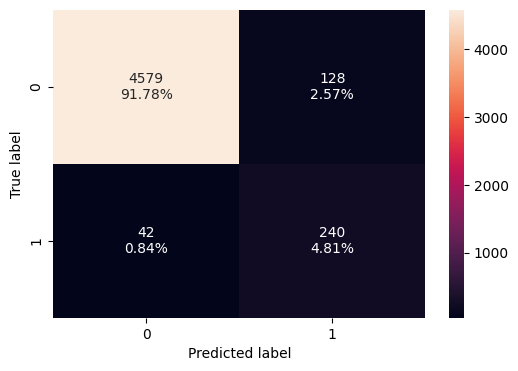

In [64]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [65]:
results.loc[2] = ["Model - ADAM, NoRegularization", 1,[32], ["relu"], "ADAM", [0], "No", 0, 25, 64, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702
2,"Model - ADAM, NoRegularization",1,[32],[relu],ADAM,[0],No,0,25,64,5.08,0.190454,0.151460,0.899614,0.915916,0.851064


## Observations: 
###     1) This model uses ADAM as the optimization technique
###     2) The performance is about the same compared to the previous models (SGD and SGD with Momentum)
###     3) Time taken is higher compared to the previous 2 models.

###     Next Experiment: Add another hidden layer to provide the model to capacity to think more.

In [66]:
#Model 3 - Adam, 2 hidden layers with regularization 
tf.keras.backend.clear_session()
model = Sequential()

In [67]:
model.add(Dense(64, activation="relu", input_dim=input_dim))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
epochs = 50
batch_size=64
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [69]:


start = time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs,batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3638 - recall: 0.8784 - val_loss: 0.2215 - val_recall: 0.8769
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2620 - recall: 0.8958 - val_loss: 0.1796 - val_recall: 0.9189
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2287 - recall: 0.8958 - val_loss: 0.1530 - val_recall: 0.9129
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.2113 - recall: 0.8958 - val_loss: 0.1490 - val_recall: 0.9189
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.2002 - recall: 0.8996 - val_loss: 0.1287 - val_recall: 0.9069
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.1887 - recall: 0.8970 - val_loss: 0.1136 - val_recall: 0.9159
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.1804 - recall: 0.9022 - val_loss: 0.1146 - val_recall: 0.9219
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.1730 - recall: 0.9099 - val_loss: 0.1153 - val_recall: 0

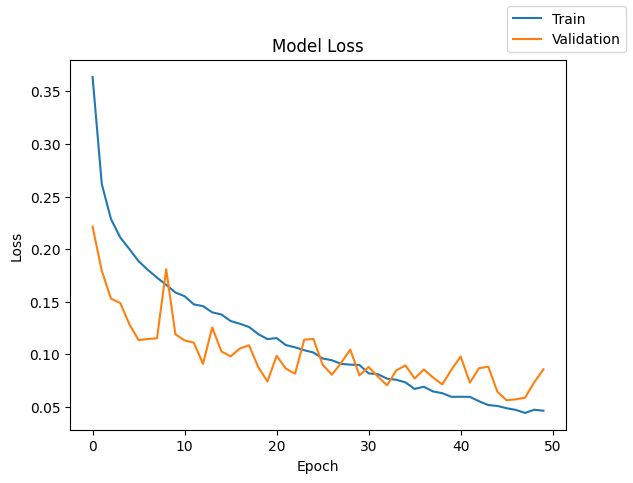

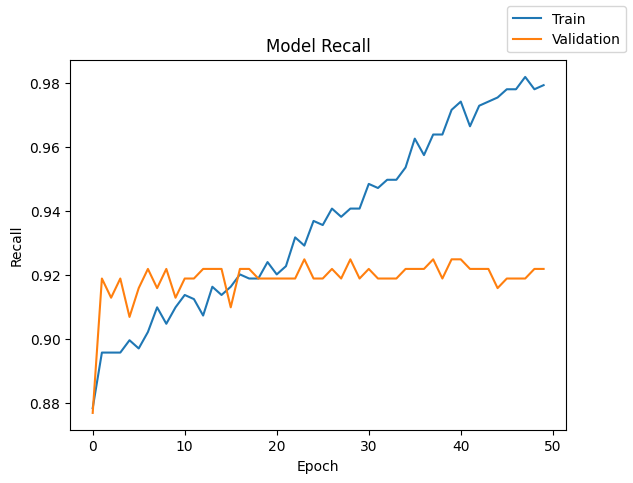

In [70]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [71]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step


,Accuracy,Recall,f1,Precision
0,0.984901,0.994852,0.879909,0.788776


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


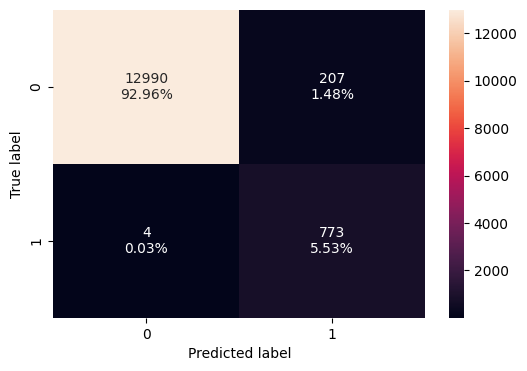

In [72]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [73]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step


,Accuracy,Recall,f1,Precision
0,0.976294,0.921922,0.812169,0.725768


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


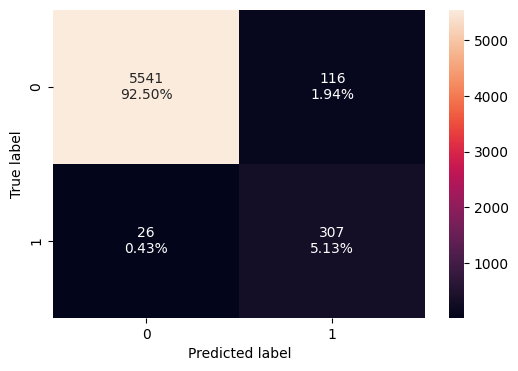

In [74]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [75]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


,Accuracy,Recall,f1,Precision
0,0.968731,0.875887,0.76,0.671196


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


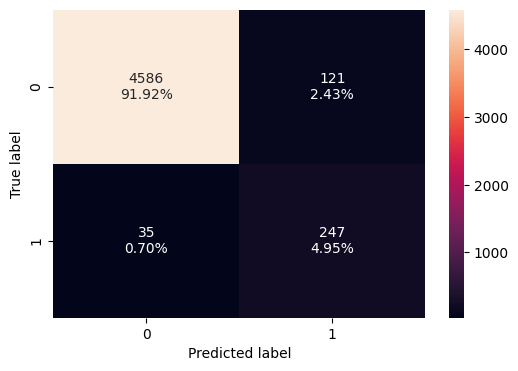

In [76]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [77]:
results.loc[3] = ["Model - Adam, 2 Hidden Layers", 2, [64, 32], ["relu", "tanh"], "ADAM", [0], "No", 0, 50, 64, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702
2,"Model - ADAM, NoRegularization",1,[32],[relu],ADAM,[0],No,0,25,64,5.08,0.190454,0.151460,0.899614,0.915916,0.851064
3,"Model - Adam, 2 Hidden Layers",2,"[64, 32]","[relu, tanh]",ADAM,[0],No,0,50,64,13.36,0.046470,0.085855,0.994852,0.921922,0.875887


## Observations:
###     1) SGD with momentum is performing the best so far.
###     2) Adam with 1 layer is still doing well but adam with 2 layers is overfitting significantly with a drop in the test recall.
###     3) Adding a layes has also increased the time significantly.
###     4) Possibly caturing a lot of noise from training. 

## Next Experiment: Next step is to stablize the 2 layers model, by ading batch normalization, also reduce the number of epocs.

In [79]:
#Model 4 - adding batch normalization with the previous model, will also perform early stoppinmg and reduce hte number of epochs
tf.keras.backend.clear_session()
model = Sequential()

In [80]:
model.add(Dense(64, activation="relu", input_dim=input_dim))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

In [81]:
optimizer = tf.keras.optimizers.Adam()
epochs=25
batch_size=64
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)

In [82]:
start = time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4101 - recall: 0.8991 - val_loss: 0.3217 - val_recall: 0.9219
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2564 - recall: 0.8906 - val_loss: 0.2069 - val_recall: 0.9279
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2172 - recall: 0.8996 - val_loss: 0.1545 - val_recall: 0.9279
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1960 - recall: 0.9022 - val_loss: 0.1584 - val_recall: 0.9159
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1859 - recall: 0.8996 - val_loss: 0.1484 - val_recall: 0.9249
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1732 - recall: 0.9086 - val_loss: 0.1321 - val_recall: 0.9249
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1626 - recall: 0.9151 - val_loss: 0.1186 - val_recall: 0.9249
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1602 - recall: 0.9086 - val_loss: 0.1376 - val_recall: 0.9189
Epoch 9/

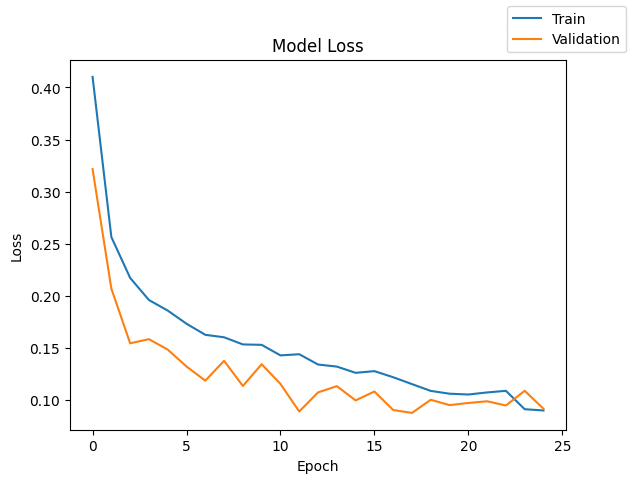

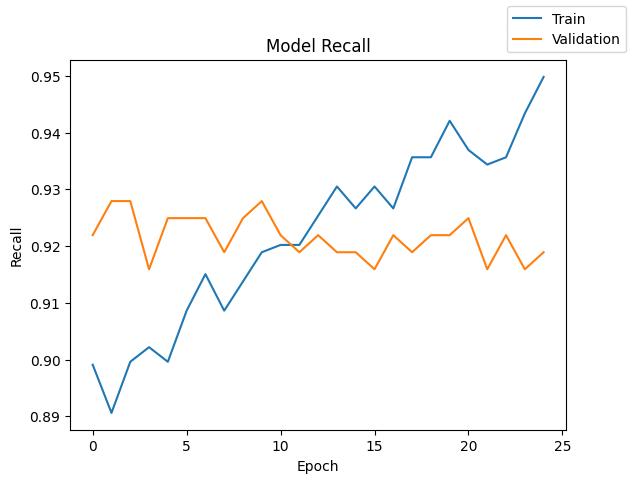

In [83]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [84]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


,Accuracy,Recall,f1,Precision
0,0.980965,0.967825,0.849718,0.757301


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


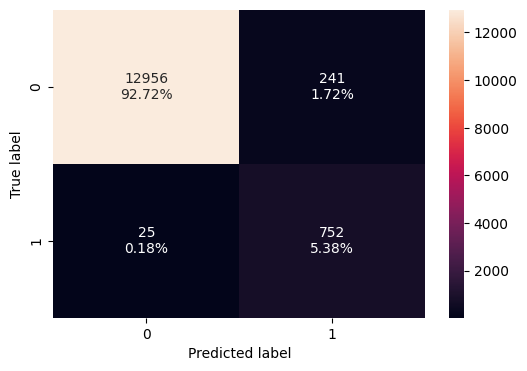

In [85]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [86]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


,Accuracy,Recall,f1,Precision
0,0.976461,0.918919,0.812749,0.728571


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


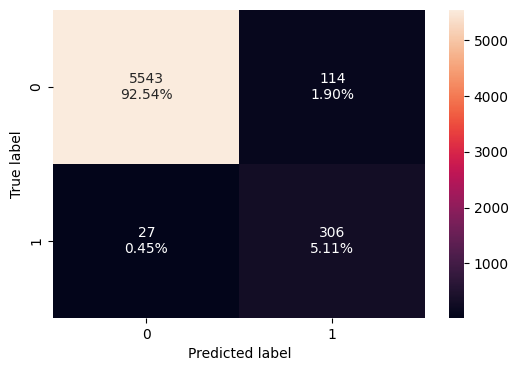

In [87]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [88]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


,Accuracy,Recall,f1,Precision
0,0.972339,0.868794,0.780255,0.708092


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


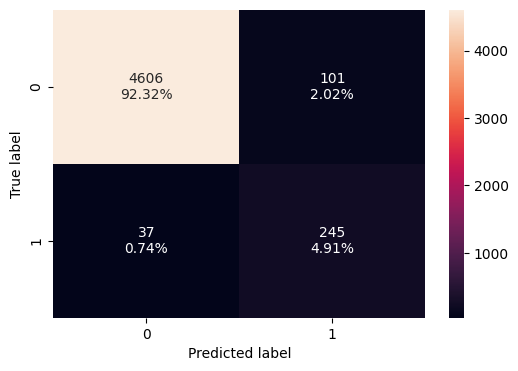

In [89]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [90]:
results.loc[4] = ["Model - Adam, 2 HIdden Layers, Batch Normalization", 2, [64, 32], ["relu", "relu"], "ADAM", [0], "Yes", 0, 25, 64, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702
2,"Model - ADAM, NoRegularization",1,[32],[relu],ADAM,[0],No,0,25,64,5.08,0.190454,0.151460,0.899614,0.915916,0.851064
3,"Model - Adam, 2 Hidden Layers",2,"[64, 32]","[relu, tanh]",ADAM,[0],No,0,50,64,13.36,0.046470,0.085855,0.994852,0.921922,0.875887
4,"Model - Adam, 2 HIdden Layers, Batch Normaliza...",2,"[64, 32]","[relu, relu]",ADAM,[0],Yes,0,25,64,9.83,0.089939,0.091594,0.967825,0.918919,0.868794


## Observations:
###     1) The model is still over fitting with there being a gap between train and test recall scores. The recall score itself has slighlty improved.
###     2) There is some improvement in computing time compared to the previous model.
###     3) Looks Batch normalization - normalizing each layers output - alone is not enough, as the model is stil overfitting.
###     4) Possibly caturing a lot of noise from training.

## Next Experiment: Add dropout to each layer to minimize overfitting

In [91]:
#Model 5 - Adam, 2 Hidden layers, BN, Dropouts, batch size 128, ecpoch 25
tf.keras.backend.clear_session()
model = Sequential() 

In [92]:
input_dim = x_train.shape[1]
model.add(Dense(64, activation="relu", input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

In [93]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [94]:
epochs = 25
batch_size=128
start = time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=25, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5304 - recall: 0.8721 - val_loss: 0.4289 - val_recall: 0.9249
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3670 - recall: 0.8867 - val_loss: 0.2597 - val_recall: 0.9159
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3192 - recall: 0.8752 - val_loss: 0.1789 - val_recall: 0.9189
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2923 - recall: 0.8739 - val_loss: 0.1649 - val_recall: 0.9219
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2744 - recall: 0.8713 - val_loss: 0.1465 - val_recall: 0.9189
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2548 - recall: 0.8880 - val_loss: 0.1498 - val_recall: 0.9189
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2530 - recall: 0.8726 - val_loss: 0.1392 - val_recall: 0.9189
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2555 - recall: 0.8790 - val_loss: 0.1402 - val_recall: 0.9189
Epoch 9/

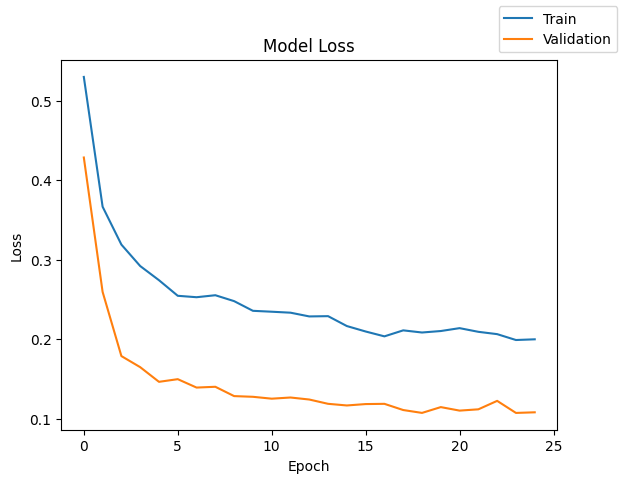

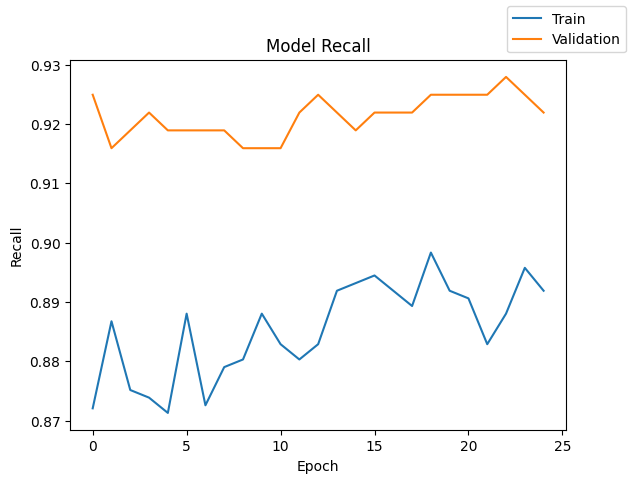

In [95]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [96]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


,Accuracy,Recall,f1,Precision
0,0.987119,0.90991,0.887077,0.865361


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step


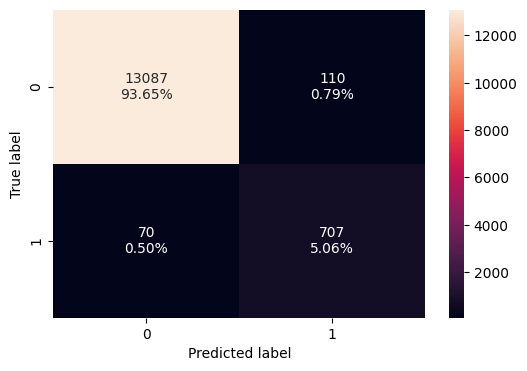

In [97]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [98]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


,Accuracy,Recall,f1,Precision
0,0.987479,0.921922,0.891147,0.86236


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


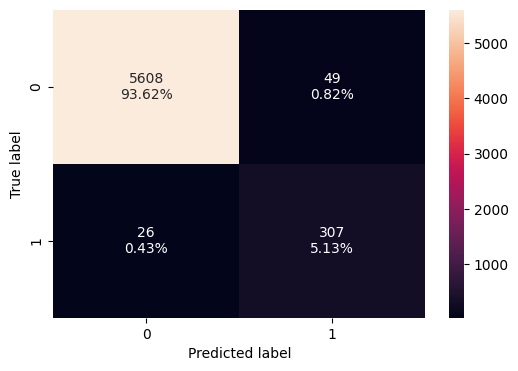

In [99]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [100]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


,Accuracy,Recall,f1,Precision
0,0.982161,0.865248,0.845754,0.827119


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


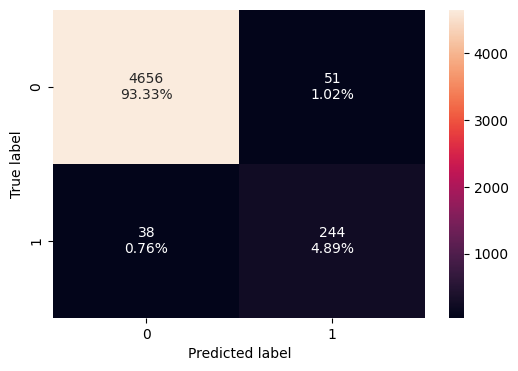

In [101]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [102]:
results.loc[5] = ["Model - Adam, 2 Hidden layers, BN, Dropout", 2, [64, 32], ["relu", "relu"], "ADAM - learning rate 1e-3", [0.3, 0.3], "Yes", 0, 25, 128, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]

In [103]:
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702
2,"Model - ADAM, NoRegularization",1,[32],[relu],ADAM,[0],No,0,25,64,5.08,0.190454,0.151460,0.899614,0.915916,0.851064
3,"Model - Adam, 2 Hidden Layers",2,"[64, 32]","[relu, tanh]",ADAM,[0],No,0,50,64,13.36,0.046470,0.085855,0.994852,0.921922,0.875887
4,"Model - Adam, 2 HIdden Layers, Batch Normaliza...",2,"[64, 32]","[relu, relu]",ADAM,[0],Yes,0,25,64,9.83,0.089939,0.091594,0.967825,0.918919,0.868794
5,"Model - Adam, 2 Hidden layers, BN, Dropout",2,"[64, 32]","[relu, relu]",ADAM - learning rate 1e-3,"[0.3, 0.3]",Yes,0,25,128,6.95,0.199996,0.108089,0.909910,0.921922,0.865248


## Observations:
###     1) Adding drop out after each hidden layers and setting the leraning rate while optimizing has helped with overfitting, with recall score for train and test are much closer to each other. 
###     2) Comparing the recall score for training data set to the previous model, looks it is not picking up a lot of noise from the training dataset. 
###     3) 2 layer model seem stable now and there is improvement in time as well.

## Next Experiment: Add l2 to this model to see if it further improves performance and reduces overfitting 

In [104]:
#Model 6 - Adam, 2 hidden layers, BN, Dropout, L2
tf.keras.backend.clear_session()
model = Sequential()

In [105]:
model.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

In [106]:
epochs=20
batch_size=128
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)

In [107]:
start=time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5684 - recall: 0.8712 - val_loss: 0.4829 - val_recall: 0.9219
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.4040 - recall: 0.8855 - val_loss: 0.3323 - val_recall: 0.9279
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.3372 - recall: 0.8803 - val_loss: 0.2481 - val_recall: 0.9219
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.3321 - recall: 0.8674 - val_loss: 0.2164 - val_recall: 0.9279
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.2992 - recall: 0.8816 - val_loss: 0.1922 - val_recall: 0.9189
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.2860 - recall: 0.8752 - val_loss: 0.1783 - val_recall: 0.9219
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.2680 - recall: 0.8829 - val_loss: 0.1619 - val_recall: 0.9219
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2692 - recall: 0.8816 - val_loss: 0.1637 - val_recall: 0

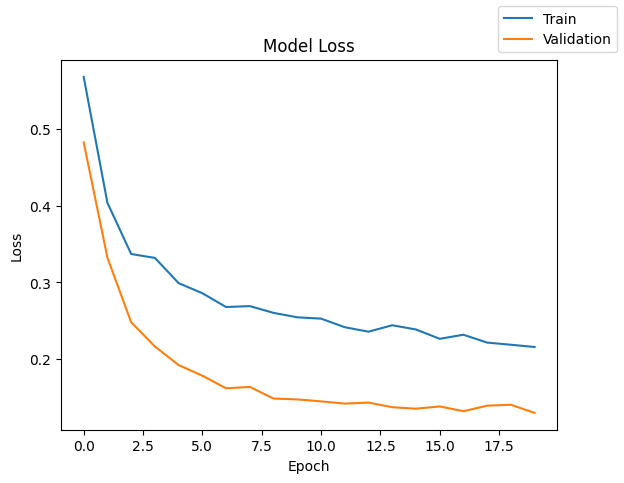

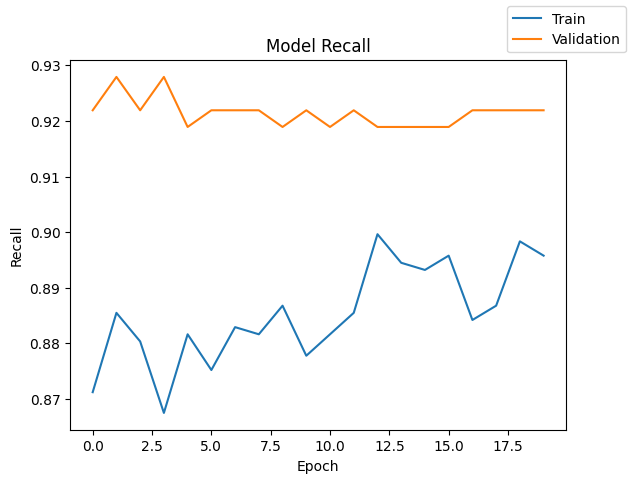

In [108]:
plot(history=history, name='loss')
plot(history=history, name='recall')

In [109]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step


,Accuracy,Recall,f1,Precision
0,0.981394,0.902188,0.843562,0.79209


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


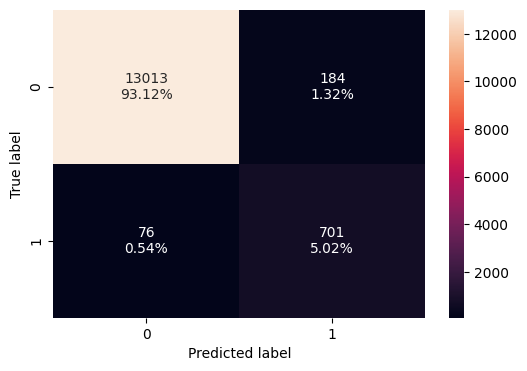

In [110]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [111]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


,Accuracy,Recall,f1,Precision
0,0.979633,0.921922,0.834239,0.761787


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step


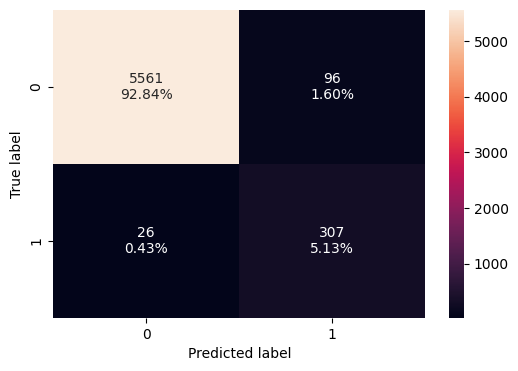

In [112]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [113]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


,Accuracy,Recall,f1,Precision
0,0.975145,0.868794,0.798046,0.737952


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step


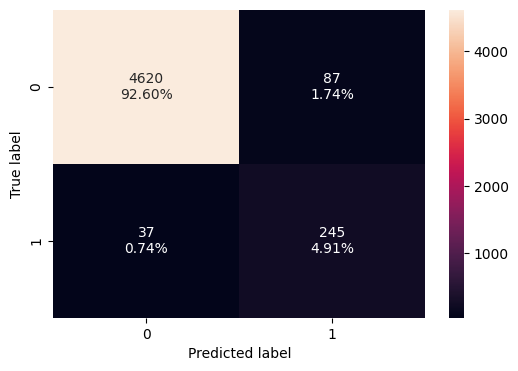

In [114]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [115]:
results.loc[6] = ["Model - Adam, 2 HIdden layers, BN, Dropout, L2", 2, [64, 32], ["relu", "relu"], "ADAM", [0.3, 0.3], "Yes", [1e-4, 1e-4], 20, 128, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]
results

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - SGD, No Normalization",1,[32],[relu],SGD,[0],No,0,25,64,3.70,0.227557,0.181685,0.899614,0.921922,0.858156
1,"Model - SGD with Momentum, No Normalization",1,[32],[relu],SGD with momentum,[0],No,0,25,64,3.79,0.192821,0.117991,0.907336,0.915916,0.861702
2,"Model - ADAM, NoRegularization",1,[32],[relu],ADAM,[0],No,0,25,64,5.08,0.190454,0.151460,0.899614,0.915916,0.851064
3,"Model - Adam, 2 Hidden Layers",2,"[64, 32]","[relu, tanh]",ADAM,[0],No,0,50,64,13.36,0.046470,0.085855,0.994852,0.921922,0.875887
4,"Model - Adam, 2 HIdden Layers, Batch Normaliza...",2,"[64, 32]","[relu, relu]",ADAM,[0],Yes,0,25,64,9.83,0.089939,0.091594,0.967825,0.918919,0.868794
5,"Model - Adam, 2 Hidden layers, BN, Dropout",2,"[64, 32]","[relu, relu]",ADAM - learning rate 1e-3,"[0.3, 0.3]",Yes,0,25,128,6.95,0.199996,0.108089,0.909910,0.921922,0.865248
6,"Model - Adam, 2 HIdden layers, BN, Dropout, L2",2,"[64, 32]","[relu, relu]",ADAM,"[0.3, 0.3]",Yes,"[0.0001, 0.0001]",20,128,3.49,0.215779,0.129711,0.902188,0.921922,0.868794


### Observations:
##      1) There is not much improvement in the performance of the model. Even thogh time taken sees significant improvement.

## Final Model Selection
### 1) Given that the costliest senario is false negatives, recall is used as the key metric to judge model performance.
### 2) Model 5 seems to have the best recall score measures (train: 0.90, test: 0.86) and is the pick of the model
### 3) Even though model 3 and model 4 has higher recall than model 5, they are overfitting. This suggest that those model are capturing a lot of noise from training dataset.Model 5 avoids that.
### 4) Adding batch normalization - stablizing outout to each layer and Drop out - removing nuerons randomely significantly helps with overfitting.

## Final Model Reccomendation - Model 5: Optimizer: Adam, Hidden layers: 2, Batch Normalization, Dropout: 0.3

In [122]:
#Final Model Model 5 Adam, 2 Hidden layers, BN, Dropout	
tf.keras.backend.clear_session()
model = Sequential()

In [123]:
input_dim = x_train.shape[1]
model.add(Dense(64, activation="relu", input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/opt/anaconda3/envs/tf220/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 192 (768.00 B)

In [124]:
epochs = 25
batch_size = 128
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [125]:
start = time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, class_weight=class_weights)
end = time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5210 - recall: 0.8847 - val_loss: 0.3854 - val_recall: 0.9189
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.3576 - recall: 0.8803 - val_loss: 0.2415 - val_recall: 0.9219
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.3102 - recall: 0.8764 - val_loss: 0.1916 - val_recall: 0.9189
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.2957 - recall: 0.8700 - val_loss: 0.1667 - val_recall: 0.9189
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.2666 - recall: 0.8777 - val_loss: 0.1497 - val_recall: 0.9159
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.2702 - recall: 0.8764 - val_loss: 0.1402 - val_recall: 0.9159
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.2497 - recall: 0.8816 - val_loss: 0.1360 - val_recall: 0.9189
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.2508 - recall: 0.8829 - val_loss: 0.1332 - val_recall: 0

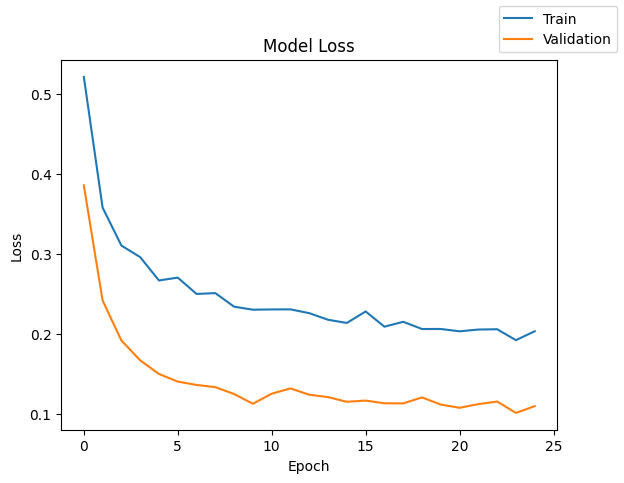

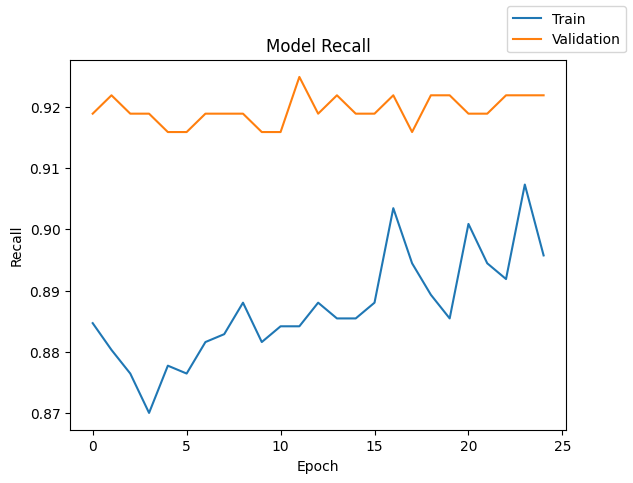

In [126]:
plot(history=history, name='loss')
plot(history=history, name='recall')


In [127]:
metrics_train = model_performance_metrics(model=model, predictors=x_train, target=y_train)
metrics_train

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step


,Accuracy,Recall,f1,Precision
0,0.982897,0.906049,0.854888,0.809195


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


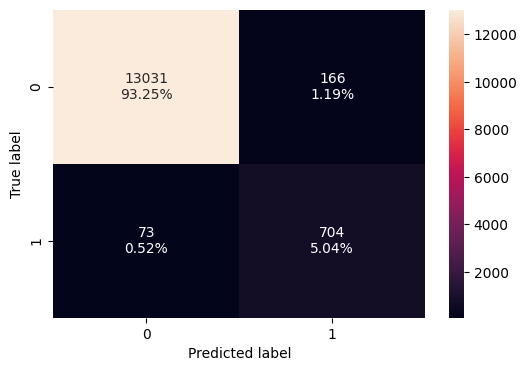

In [128]:
create_confusion_matrix(model=model, predictors=x_train, target=y_train)

In [129]:
metrics_val = model_performance_metrics(model=model, predictors=x_val, target=y_val)
metrics_val

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


,Accuracy,Recall,f1,Precision
0,0.983973,0.921922,0.864789,0.814324


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


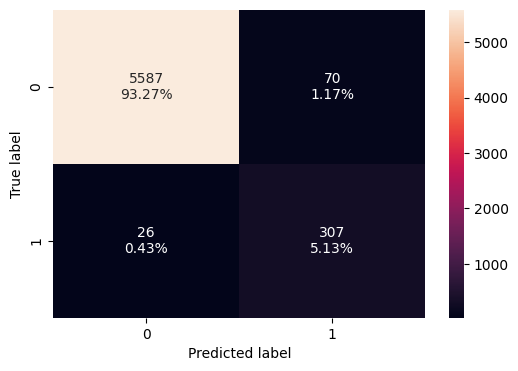

In [130]:
create_confusion_matrix(model=model, predictors=x_val, target=y_val)

In [131]:
metrics_test = model_performance_metrics(model=model, predictors=x_test, target=y_test)
metrics_test

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


,Accuracy,Recall,f1,Precision
0,0.980557,0.87234,0.835314,0.801303


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


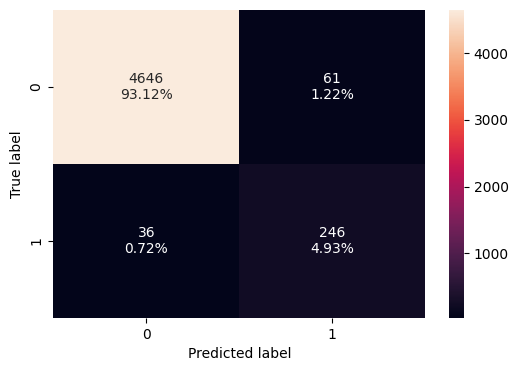

In [132]:
create_confusion_matrix(model=model, predictors=x_test, target=y_test)

In [133]:
final_model_metrics = pd.DataFrame(columns=["model", "HiddenLayers", "Neurons", "Activation", "Optimizer", "DropOuts", "BatchNorm", "L2", "epochs",  "batch size", "time taken", "trian_loss","val_loss", "train_recall", "val_recall", "test_recall"])
final_model_metrics.loc[0] = ["Model - Adam, 2 Hidden layers, BN, Dropout", 2, [64, 32], ["relu", "relu"], "ADAM - learning rate 1e-3", [0.3, 0.3], "Yes", 0, 25, 128, round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], metrics_train['Recall'].item(), metrics_val['Recall'].item(), metrics_test['Recall'].item()]

In [134]:
final_model_metrics

,model,HiddenLayers,Neurons,Activation,Optimizer,DropOuts,BatchNorm,L2,epochs,batch size,time taken,trian_loss,val_loss,train_recall,val_recall,test_recall
0,"Model - Adam, 2 Hidden layers, BN, Dropout",2,"[64, 32]","[relu, relu]",ADAM - learning rate 1e-3,"[0.3, 0.3]",Yes,0,25,128,4.0,0.203111,0.109538,0.906049,0.921922,0.87234


## Key Takeaways and suggestions:
### 1) The model selected does a good job of detecting possible future faliures (class: 1) with about 87% certinity.
### 2) The model will detect Wind turbines facing a potential breakdown, this will result in some repair cost but it will make significant savings by avoding potential replacement cost, which is much higher than repair cost.
### 3) The model sometimes will wrongly predict  potential faliures, which will result in some inspection cost.
### 4) Model can be further fine tuned to imrpove the recall metric so it better predicts potential breakdowns. Some techniques that can utilized are tuning the learning rate further, adding early stopping to avoid capturing noise etc.
### 5) This model will do a good job of avoiding replacement cost, will mode data collected this model can be improved further.